In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#We will only use 4 columns to build the model Pclass,Sex,Age,Fare9we will drop all the other columns
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [5]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [6]:
df_inputs=df[['Pclass','Sex','Age','Fare']]

In [7]:
df_target=df[['Survived']]

In [8]:
df_inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [9]:
df_target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [10]:
import missingno as msno

C:\Users\stell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

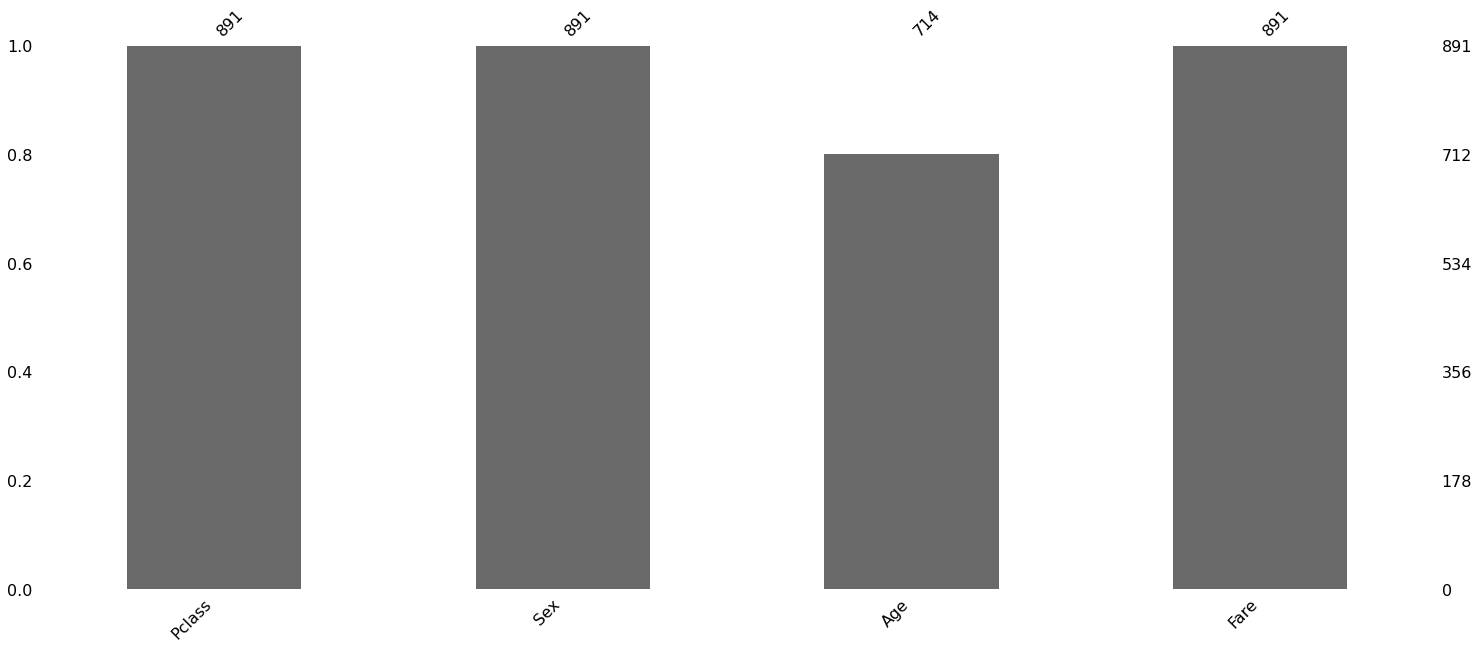

In [11]:
#We can observe that there are missing values for the variable 'Age'
msno.bar(df_inputs)

In [12]:
df_inputs['Age']=df_inputs['Age'].fillna(df_inputs['Age'].mean())

C:\Users\stell\AppData\Local\Temp/ipykernel_10052/220155928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs['Age']=df_inputs['Age'].fillna(df_inputs['Age'].mean())


In [13]:
df_inputs

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


<AxesSubplot:>

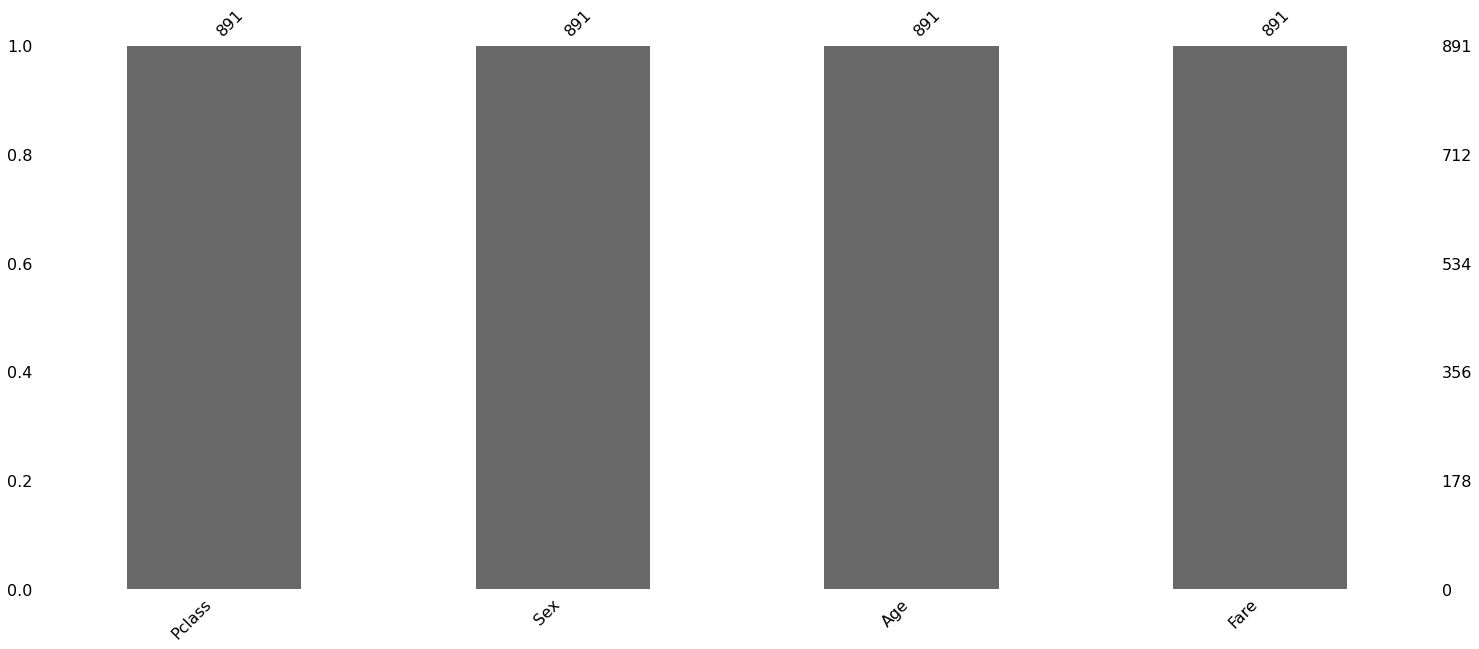

In [14]:
msno.bar(df_inputs)

In [15]:
from sklearn import preprocessing 

In [16]:
encoded_output=preprocessing.LabelEncoder()

In [17]:
df_inputs['Sex']=encoded_output.fit_transform(df_inputs['Sex'].values)

C:\Users\stell\AppData\Local\Temp/ipykernel_10052/3106378004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs['Sex']=encoded_output.fit_transform(df_inputs['Sex'].values)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_inputs,df_target,train_size=0.5)

In [20]:
X_train

,Pclass,Sex,Age,Fare
522,3,1,29.699118,7.2250
632,1,1,32.000000,30.5000
342,2,1,28.000000,13.0000
19,3,0,29.699118,7.2250
252,1,1,62.000000,26.5500
...,...,...,...,...
291,1,0,19.000000,91.0792
264,3,0,29.699118,7.7500
654,3,0,18.000000,6.7500
837,3,1,29.699118,8.0500


In [21]:
X_test

,Pclass,Sex,Age,Fare
95,3,1,29.699118,8.0500
563,3,1,29.699118,8.0500
135,2,1,23.000000,15.0458
29,3,1,29.699118,7.8958
658,2,1,23.000000,13.0000
...,...,...,...,...
300,3,0,29.699118,7.7500
646,3,1,19.000000,7.8958
268,1,0,58.000000,153.4625
737,1,1,35.000000,512.3292


In [22]:
y_train

,Survived
522,0
632,1
342,0
19,1
252,0
...,...
291,1
264,0
654,0
837,0


In [23]:
y_test

,Survived
95,0
563,0
135,0
29,0
658,0
...,...
300,1
646,0
268,1
737,1


In [24]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
print(model.predict(X_test))

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0
 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0
 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1
 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0]


In [27]:
#Accuracy of the model
model.score(X_test,y_test)

0.757847533632287